In [9]:
import pandas as pd

In [10]:
from stockstats import *

In [11]:
bc = StockDataFrame.retype(pd.read_csv('coinbase.csv'))

In [12]:
bc.head()

,currency,close,open (usd),high,low
date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [13]:
bc.tail()

,currency,close,open (usd),high,low
date,,,,,
2021-02-24,BTC,48745.432984,48923.035081,51413.613557,47032.524262
2021-02-25,BTC,48291.412083,49746.651631,52076.317723,47501.674798
2021-02-26,BTC,45752.114919,47135.551728,48453.738635,44279.449538
2021-02-27,BTC,46642.606077,46326.824066,48353.001000,46207.705779
2021-02-28,BTC,45092.806573,46204.058564,46675.197850,43119.157024


In [14]:
bc['rsi_14']

date
2013-10-01           NaN
2013-10-02    100.000000
2013-10-03      9.014525
2013-10-04     42.633257
2013-10-05     48.087293
                 ...    
2021-02-24     54.937794
2021-02-25     53.994533
2021-02-26     48.934028
2021-02-27     50.679731
2021-02-28     47.628097
Name: rsi_14, Length: 2698, dtype: float64

In [15]:
bc['close_-1_r']

date
2013-10-01          NaN
2013-10-02     1.455671
2013-10-03   -13.447188
2013-10-04     9.292118
2013-10-05     2.244793
                ...    
2021-02-24     1.188543
2021-02-25    -0.931412
2021-02-26    -5.258279
2021-02-27     1.946339
2021-02-28    -3.322712
Name: close_-1_r, Length: 2698, dtype: float64

In [16]:
bc

,currency,close,open (usd),high,low,close_-1_s,close_-1_d,rs_14,rsi_14,close_-1_r
date,,,,,,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490,NaN,NaN,NaN,NaN,NaN
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830,123.654990,1.800010,inf,100.000000,1.455671
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330,125.455000,-16.870170,0.099077,9.014525,-13.447188
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160,108.584830,10.089830,0.743170,42.633257,9.292118
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660,118.674660,2.664000,0.926311,48.087293,2.244793
...,...,...,...,...,...,...,...,...,...,...
2021-02-24,BTC,48745.432984,48923.035081,51413.613557,47032.524262,48172.877477,572.555507,1.219155,54.937794,1.188543
2021-02-25,BTC,48291.412083,49746.651631,52076.317723,47501.674798,48745.432984,-454.020901,1.173655,53.994533,-0.931412
2021-02-26,BTC,45752.114919,47135.551728,48453.738635,44279.449538,48291.412083,-2539.297164,0.958251,48.934028,-5.258279


In [31]:
new_bc = bc.drop(columns=['open (usd)', 'high','low','close_-1_s','close_-1_d','rs_14'])

In [33]:
import matplotlib.pyplot as plt

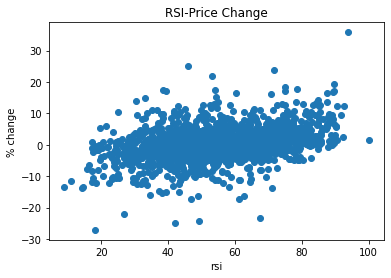

In [36]:
plt.scatter(new_bc['rsi_14'], new_bc['close_-1_r'])
plt.title('RSI-Price Change')
plt.xlabel("rsi")
plt.ylabel("% change")
plt.show()


In [37]:
new_bc['pos_neg'] = (new_bc['close_-1_r'] >= 0)

In [38]:
new_bc

,currency,close,rsi_14,close_-1_r,pos_neg
date,,,,,
2013-10-01,BTC,123.654990,NaN,NaN,False
2013-10-02,BTC,125.455000,100.000000,1.455671,True
2013-10-03,BTC,108.584830,9.014525,-13.447188,False
2013-10-04,BTC,118.674660,42.633257,9.292118,True
2013-10-05,BTC,121.338660,48.087293,2.244793,True
...,...,...,...,...,...
2021-02-24,BTC,48745.432984,54.937794,1.188543,True
2021-02-25,BTC,48291.412083,53.994533,-0.931412,False
2021-02-26,BTC,45752.114919,48.934028,-5.258279,False


<AxesSubplot:xlabel='date'>

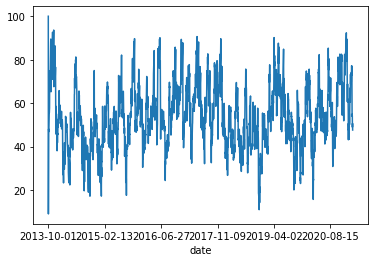

In [41]:
new_bc['rsi_14'].plot()

In [43]:
new_bc['next_close'] = new_bc['close'].shift(-1)

In [51]:
new_bc['next_pos_neg'] = (new_bc['next_close'] >= 0)

In [67]:
line = new_bc.tail(200)

In [68]:
print(line)

           currency         close     rsi_14  close_-1_r  pos_neg  \
date                                                                
2020-08-13      BTC  11752.168656  63.835013    1.754375     True   
2020-08-14      BTC  11783.283411  64.224213    0.264758     True   
2020-08-15      BTC  11895.626950  65.661149    0.953415     True   
2020-08-16      BTC  11896.947170  65.678595    0.011098     True   
2020-08-17      BTC  12399.111885  71.590852    4.220954     True   
...             ...           ...        ...         ...      ...   
2021-02-24      BTC  48745.432984  54.937794    1.188543     True   
2021-02-25      BTC  48291.412083  53.994533   -0.931412    False   
2021-02-26      BTC  45752.114919  48.934028   -5.258279    False   
2021-02-27      BTC  46642.606077  50.679731    1.946339     True   
2021-02-28      BTC  45092.806573  47.628097   -3.322712    False   

              next_close  next_pos_neg  
date                                    
2020-08-13  11783.28

In [45]:
from mpl_toolkits.mplot3d import axes3d

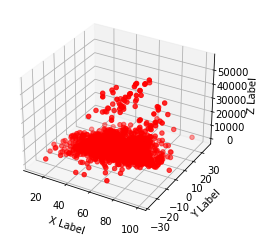

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = new_bc['rsi_14']
y =new_bc['close_-1_r']
z =new_bc['next_close']



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
dataset = new_bc.tail(300)

In [71]:
dataset.head()

,currency,close,rsi_14,close_-1_r,pos_neg,next_close,next_pos_neg
date,,,,,,,
2020-05-05,BTC,8978.283587,74.525447,1.021408,True,9371.684273,True
2020-05-06,BTC,9371.684273,78.359355,4.381691,True,9900.678867,True
2020-05-07,BTC,9900.678867,82.231756,5.644605,True,9917.248414,True
2020-05-08,BTC,9917.248414,82.338363,0.167358,True,9617.518195,True
2020-05-09,BTC,9617.518195,73.721673,-3.022312,False,8786.655182,True


In [72]:
X = dataset[['close', 'rsi_14', 'close_-1_r']]
y = dataset['next_close']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
close,1.003327
rsi_14,2.163349
close_-1_r,-3.545451


In [76]:
y_pred = regressor.predict(X_test)

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
date,,
2020-11-29,19382.360586,18214.887235
2020-11-09,15374.044386,15401.459559
2020-05-17,9723.680150,9754.721198
2020-12-12,19060.276901,18968.402933
2020-12-30,29111.521567,28941.376391
2020-09-18,11048.879278,10992.765407
2020-12-21,23433.980758,23331.658206
2020-11-27,17814.780278,17112.735997
2020-06-26,9022.153768,9211.888829


In [80]:
close_only = new_bc['close']

In [81]:
close_only

date
2013-10-01      123.654990
2013-10-02      125.455000
2013-10-03      108.584830
2013-10-04      118.674660
2013-10-05      121.338660
                  ...     
2021-02-24    48745.432984
2021-02-25    48291.412083
2021-02-26    45752.114919
2021-02-27    46642.606077
2021-02-28    45092.806573
Name: close, Length: 2698, dtype: float64

In [83]:
df.columns

Index(['Actual', 'Predicted'], dtype='object')

In [84]:
df.join(close_only)

,Actual,Predicted,close
date,,,
2020-11-29,19382.360586,18214.887235,18114.414349
2020-11-09,15374.044386,15401.459559,15283.780139
2020-05-17,9723.680150,9754.721198,9684.701959
2020-12-12,19060.276901,18968.402933,18882.260171
2020-12-30,29111.521567,28941.376391,28768.836208
2020-09-18,11048.879278,10992.765407,10933.931162
2020-12-21,23433.980758,23331.658206,23177.270998
2020-11-27,17814.780278,17112.735997,17023.961400
2020-06-26,9022.153768,9211.888829,9171.732086
